## Workshop Week 6

## Logistic Regression
Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

In [168]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [169]:
# Examine the data: check number of rows and number of columns
rows, cols = bcancer.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 699
Number of columns: 11


In [170]:
# Look at the statistical summary of the dataframe
bcancer.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [171]:
# Check how many classes we do have from the "class" column
print(f"Number of classes: {bcancer['class'].nunique()}")

Number of classes: 2


In [172]:
# Check number of samples for each class and comment whether dataset is balanced?
total = len(bcancer)
class_2 = (bcancer['class'] == 2).sum()
class_4 = (bcancer['class'] == 4).sum()

print(f"Total number of samples: {total}")
print(f"Total number of samples for class 2: {class_2}")
print(f"Total number of samples for class 4: {class_4}")

Total number of samples: 699
Total number of samples for class 2: 458
Total number of samples for class 4: 241


The number of benign samples (class 2) are nearly double the number of malignant (class 4) samples. This is a skewed dataset. However, since there are many samples the test is still fair.

In [173]:
# Deal with the NaN values in the data
bcancer_clean = bcancer.dropna()
bcancer_clean.describe()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [174]:
bcancer_clean.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [175]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(bcancer_clean, test_size=0.2, random_state=142)

In [176]:
# Build your Logistic Regression model
reg = linear_model.LinearRegression()
X_train = train[['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses']]
Y_train = train['class']

X_test = test[['sample_code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses']]
Y_test = test['class']

reg.fit(X_train, Y_train)

LinearRegression()

In [177]:
# Do predictions on test set
prediction = reg.predict(X_test)

mse = ((np.array(Y_test)-prediction)**2).sum()/len(Y_test)
root_mse = np.sqrt(mse)
r2 = r2_score(Y_test, prediction)

print(f"MSE: {mse}")
print(f"Root MSE: {root_mse}")
print(f"R Squared: {r2}")

MSE: 0.1681383848042793
Root MSE: 0.41004680806498095
R Squared: 0.8215051275796652


### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [178]:
int_prediction = np.round(prediction)

In [179]:
# Evaluate the performance of your trained model
accuracy = accuracy_score(Y_test, int_prediction)
print(f"accuracy in percentage: {accuracy*100:.2f}%")


accuracy in percentage: 83.94%


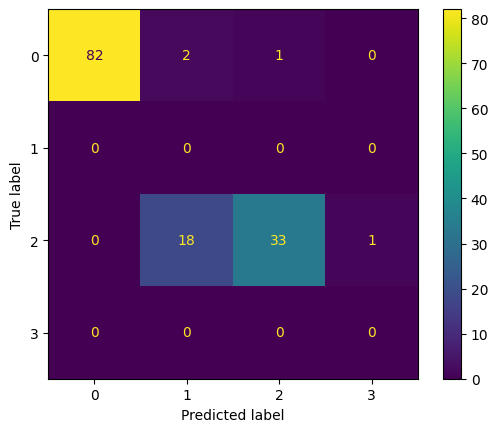

In [180]:
cm = confusion_matrix(Y_test, int_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**This is the checkpoint mark for this week's workshop. You need to report `Accuracy Score` on test set and also show `confusion matrix`. You also need to provide analysis based on the results you got.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [196]:
print("Using the best 3 features found through RFE:")
model_3_features = linear_model.LinearRegression()
rfe_3_features = RFE(model_3_features, n_features_to_select=3)

rfe_3_features.fit(X_train, Y_train)
selected_3_features = X_train.columns[rfe_3_features.support_]

print(f"Selected features: {selected_3_features}")

X_train_3 = train[selected_3_features]
X_test_3 = test[selected_3_features]

model_3_features.fit(X_train_3, Y_train)

# Do predictions on test set
prediction_3 = model_3_features.predict(X_test_3)

mse_3 = ((np.array(Y_test)-prediction_3)**2).sum()/len(Y_test)
root_mse_3 = np.sqrt(mse_3)
r2_3 = r2_score(Y_test, prediction_3)

print(f"MSE: {mse_3}")
print(f"Root MSE: {root_mse_3}")
print(f"R Squared: {r2_3}")

Using the best 3 features found through RFE:
Selected features: Index(['clump_thickness', 'uniformity_cell_size', 'bare_nuclei'], dtype='object')
MSE: 0.18695663669559284
Root MSE: 0.43238482477486745
R Squared: 0.801527765037354


In [198]:
print("Using the best 4 features found through RFE:")
model_4_features = linear_model.LinearRegression()
rfe_4_features = RFE(model_4_features, n_features_to_select=4)
rfe_4_features.fit(X_train, Y_train)

selected_4_features = X_train.columns[rfe_4_features.support_]

print(f"Selected features: {selected_4_features}")
X_train_4 = train[selected_4_features]
X_test_4 = test[selected_4_features]

model_4_features.fit(X_train_4, Y_train)

# Do predictions on test set
prediction_4 = model_4_features.predict(X_test_4)

mse_4 = ((np.array(Y_test)-prediction_4)**2).sum()/len(Y_test)
root_mse_4 = np.sqrt(mse_4)
r2_4 = r2_score(Y_test, prediction_4)

print(f"MSE: {mse_4}")
print(f"Root MSE: {root_mse_4}")
print(f"R Squared: {r2_4}")

Using the best 4 features found through RFE:
Selected features: Index(['clump_thickness', 'uniformity_cell_size', 'bare_nuclei',
       'bland_chromatin'],
      dtype='object')
MSE: 0.18588493836501468
Root MSE: 0.4311437560315755
R Squared: 0.8026654746508507


In [199]:
print("Using the best 5 features found through RFE:")
model_5_features = linear_model.LinearRegression()
rfe_5_features = RFE(model_5_features, n_features_to_select=5)
rfe_5_features.fit(X_train, Y_train)

selected_5_features = X_train.columns[rfe_5_features.support_]

print(f"Selected features: {selected_5_features}")
X_train_5 = train[selected_5_features]
X_test_5 = test[selected_5_features]

model_5_features.fit(X_train_5, Y_train)

# Do predictions on test set
prediction_5 = model_5_features.predict(X_test_5)

mse_5 = ((np.array(Y_test)-prediction_5)**2).sum()/len(Y_test)
root_mse_5 = np.sqrt(mse_5)
r2_5 = r2_score(Y_test, prediction_5)

print(f"MSE: {mse_5}")
print(f"Root MSE: {root_mse_5}")
print(f"R Squared: {r2_5}")

Using the best 5 features found through RFE:
Selected features: Index(['clump_thickness', 'uniformity_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli'],
      dtype='object')
MSE: 0.17164267942359016
Root MSE: 0.41429781489116035
R Squared: 0.8177849858539953


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 

In [202]:
correlation_matrix = bcancer_clean.corr()
correlation_matrix['class']

sample_code_number            -0.084701
clump_thickness                0.714790
uniformity_cell_size           0.820801
uniformity_cell_shape          0.821891
marginal_adhesion              0.706294
single_epithelial_cell_size    0.690958
bare_nuclei                    0.822696
bland_chromatin                0.758228
normal_nucleoli                0.718677
mitoses                        0.423448
class                          1.000000
Name: class, dtype: float64

From the above tests using 3, 4, and 5 of the best features for classifying the bening or malignant cases, it is clear that these models only improve in efficiency as more data is fed into the model. This means that we shoould use majority of the columns. The only features that we may not want to use are sample_code_number and mitoses because their correlation with class is extremely low, as seen in the correlation matrix.
The initial model is the best one by far, and would be very useful in a clinical diagnostic setting. 